In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv('/content/final_internship_data.csv')

In [3]:
df.head(5)

,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,KHVrEVlD,Kimberly Adams,Amy Butler,Very Good,windy,Congested Traffic,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-1.288826,...,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,lPxIuEri,Justin Tapia,Hannah Zimmerman,Excellent,cloudy,Flow Traffic,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-1.291824,...,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,Bad,stormy,Congested Traffic,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-1.291242,...,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,9I7kWFgd,Steven Wilson,Amy Horn,Very Good,stormy,Flow Traffic,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-1.291319,...,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,8QN5ZaGN,Alexander Andrews,Cassandra Larson,Bad,stormy,Congested Traffic,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-1.290987,...,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703


In [4]:
df.duplicated().sum()

0

In [5]:
# since i have features derived from longtitude and latitude no need for these columns for my analysis
df.drop(columns=['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'],inplace=True, axis=1)
df.columns

Index(['User ID', 'User Name', 'Driver Name', 'Car Condition', 'Weather',
       'Traffic Condition', 'key', 'fare_amount', 'pickup_datetime',
       'passenger_count', 'hour', 'day', 'month', 'weekday', 'year',
       'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist', 'nyc_dist', 'distance',
       'bearing'],
      dtype='object')

In [6]:
df.isnull().sum()

,0
User ID,0
User Name,0
Driver Name,0
Car Condition,0
Weather,0
Traffic Condition,0
key,0
fare_amount,0
pickup_datetime,0
passenger_count,0


In [7]:
df.dropna(axis=0, inplace=True)

In [8]:
d = 0
num_people = df[df['distance'] == d].shape[0]
print(f"Number of people who traveled {d} units: {num_people}")

Number of people who traveled 0 units: 14250


In [9]:
d = 0
num_people = df[df['fare_amount'] <= 0].shape[0]
print(f"number of people who paid 0 or less is: {num_people}")

number of people who paid 0 or less is: 35


In [10]:
d = 0
num_people = df[df['passenger_count'] <= 0].shape[0]
print(f"number of people who booked is 0 is: {num_people}")

number of people who booked is 0 is: 1791


In [11]:
#Calculate mean or median distance
mean_distance = df['distance'].mean()
median_distance = df['distance'].median()

# Impute zero distances with the median
df['distance'] = df['distance'].replace(0, mean_distance)

# Verify imputation
print(df[df['distance'] == 0].shape[0])  # Should be zero

0


In [12]:
# Remove rows with invalid fare_amount
df = df[df['fare_amount'] > 0]

# Remove rows with invalid passenger_count
df = df[df['passenger_count'] > 0]

In [13]:
df.describe()

,fare_amount,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
count,498169.000000,498169.000000,498169.000000,498169.000000,498169.000000,498169.000000,498169.000000,498169.000000,498169.000000,498169.000000,498169.000000,498169.000000,498169.000000,498169.000000
mean,11.367853,1.689505,13.510435,15.683166,6.270565,3.042034,2011.740373,385.463783,380.690052,364.029153,363.860266,356.177889,19.807470,0.297005
std,9.925028,1.305836,6.512229,8.681251,3.437320,1.949250,1.863714,2420.250132,2429.970114,2426.240568,2429.514179,2429.896570,364.680165,1.804550
min,0.010000,1.000000,0.000000,1.000000,1.000000,0.000000,2009.000000,1.017646,1.460945,0.382119,0.532545,0.080500,0.000084,-3.141593
25%,6.000000,1.000000,9.000000,8.000000,3.000000,1.000000,2010.000000,41.340929,32.174132,17.100945,14.887335,7.147799,1.304013,-0.854940
50%,8.500000,1.000000,14.000000,16.000000,6.000000,3.000000,2012.000000,42.522664,34.788039,19.591453,18.348222,10.458930,2.250455,-0.050177
75%,12.500000,2.000000,19.000000,23.000000,9.000000,5.000000,2013.000000,43.785157,38.304994,22.214559,22.418194,14.449413,4.254349,2.206468
max,500.000000,6.000000,23.000000,31.000000,12.000000,6.000000,2015.000000,30133.067880,30167.595967,30167.285794,30159.407296,30162.285356,12399.956433,3.141593


In [14]:
## get copy of the dataset to avoid any problems on the real dataset
df_copy = df.copy()

In [15]:
numeric_columns = [
    'fare_amount',
    'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist', 'nyc_dist', 'distance','passenger_count']

for col in numeric_columns:
    print(f"Skewness of {col}: {df_copy[col].skew()}")

Skewness of fare_amount: 4.8982749924944295
Skewness of jfk_dist: 7.166593247138619
Skewness of ewr_dist: 7.163241681280367
Skewness of lga_dist: 7.16582046066228
Skewness of sol_dist: 7.1637992706126505
Skewness of nyc_dist: 7.164029444533879
Skewness of distance: 23.142283547829877
Skewness of passenger_count: 1.9816808070491112


In [16]:
for col in numeric_columns:
    if df_copy[col].dtype in ['int64', 'float64']:  # Check if the column is numeric
        # Calculate Q1, Q3, and IQR
        Q1 = df_copy[col].quantile(0.25)
        Q3 = df_copy[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap and floor outliers
        df_copy[col] = np.where(df_copy[col] < lower_bound, lower_bound, df_copy[col])
        df_copy[col] = np.where(df_copy[col] > upper_bound, upper_bound, df_copy[col])

In [17]:
# Check skewness after transformation
for col in numeric_columns:
    if f'{col}' in df_copy.columns:
        print(f"Skewness of {col}_log: {df_copy[f'{col}'].skew()}")


Skewness of fare_amount_log: 1.0203936945818517
Skewness of jfk_dist_log: -0.16512407616828695
Skewness of ewr_dist_log: 0.7825922594976525
Skewness of lga_dist_log: 0.14623225323644773
Skewness of sol_dist_log: 0.644007877501783
Skewness of nyc_dist_log: 0.7358951480384452
Skewness of distance_log: 1.1131005153594749
Skewness of passenger_count_log: 1.4157125912620625


In [18]:
df_copy = df_copy.drop(columns=['pickup_datetime', 'User ID', 'Driver Name', 'User Name', 'key'])

In [19]:
from sklearn.preprocessing import LabelEncoder

## one hot encoding for feautres
# Columns to label encode
categorical_columns = ['Car Condition', 'Weather', 'Traffic Condition']

# Apply Label Encoding to each categorical column
for col in categorical_columns:
    le = LabelEncoder()
    df_copy[col] = le.fit_transform(df_copy[col])

# Display the DataFrame after label encoding
print(df_copy.head())

   Car Condition  Weather  Traffic Condition  fare_amount  passenger_count  \
0              3        4                  0          4.5              1.0   
1              1        0                  2         16.9              1.0   
2              0        2                  0          5.7              2.0   
3              3        2                  2          7.7              1.0   
4              0        2                  0          5.3              1.0   

   hour  day  month  weekday  year   jfk_dist   ewr_dist   lga_dist  \
0    17   15      6        0  2009  37.674585  47.501286  14.342611   
1    16    5      1        1  2010  44.667679  31.832358  23.130775   
2     0   18      8        3  2011  43.597686  33.712082  19.865289   
3     4   21      4        5  2012  42.642965  32.556289  21.063132   
4     7    9      3        1  2010  43.329953  39.406828  15.219339   

    sol_dist   nyc_dist  distance   bearing  
0  33.714484  25.401835  1.030764 -2.918897  
1  15.125872

In [20]:
df_copy.head(5)

,Car Condition,Weather,Traffic Condition,fare_amount,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,3,4,0,4.5,1.0,17,15,6,0,2009,37.674585,47.501286,14.342611,33.714484,25.401835,1.030764,-2.918897
1,1,0,2,16.9,1.0,16,5,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,0,2,0,5.7,2.0,0,18,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,3,2,2,7.7,1.0,4,21,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,0,2,0,5.3,1.0,7,9,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703


In [21]:
df_copy.dtypes

,0
Car Condition,int64
Weather,int64
Traffic Condition,int64
fare_amount,float64
passenger_count,float64
hour,int64
day,int64
month,int64
weekday,int64
year,int64


In [22]:
y = df['fare_amount']
y.value_counts()

,count
fare_amount,
6.50,24017
4.50,20480
8.50,18685
5.30,14630
5.70,14391
...,...
15.45,1
54.65,1
76.60,1


In [23]:
# Define the fraction of the data you want to keep (e.g., 10%)
sample_fraction = 1

# Perform random sampling
smaller_sample = df_copy.sample(frac=sample_fraction, random_state=42)



In [24]:
from sklearn.model_selection import train_test_split
# Drop the bin columns (modify column name if needed)



X = smaller_sample.drop(columns=['fare_amount'])  # Features
y = smaller_sample['fare_amount']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


print("Balanced train set size:", X_train.shape)
print("Balanced test set size:", X_test.shape)


Balanced train set size: (398535, 16)
Balanced test set size: (99634, 16)


In [25]:
# Initialize and train Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_linear = linear_reg.predict(X_test)

# Evaluate Linear Regression
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression:")
print(f"  MAE: {mae_linear:.4f}")
print(f"  MSE: {mse_linear:.4f}")
print(f"  R²: {r2_linear:.4f}")


Linear Regression:
  MAE: 1.9831
  MSE: 9.2463
  R²: 0.6925


In [26]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features (degree=2)
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Initialize and train Polynomial Regression
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

# Predict on the test set
y_pred_poly = poly_reg.predict(X_test_poly)

# Evaluate Polynomial Regression
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Polynomial Regression:")
print(f"  MAE: {mae_poly:.4f}")
print(f"  MSE: {mse_poly:.4f}")
print(f"  R²: {r2_poly:.4f}")

Polynomial Regression:
  MAE: 1.7773
  MSE: 7.5732
  R²: 0.7481


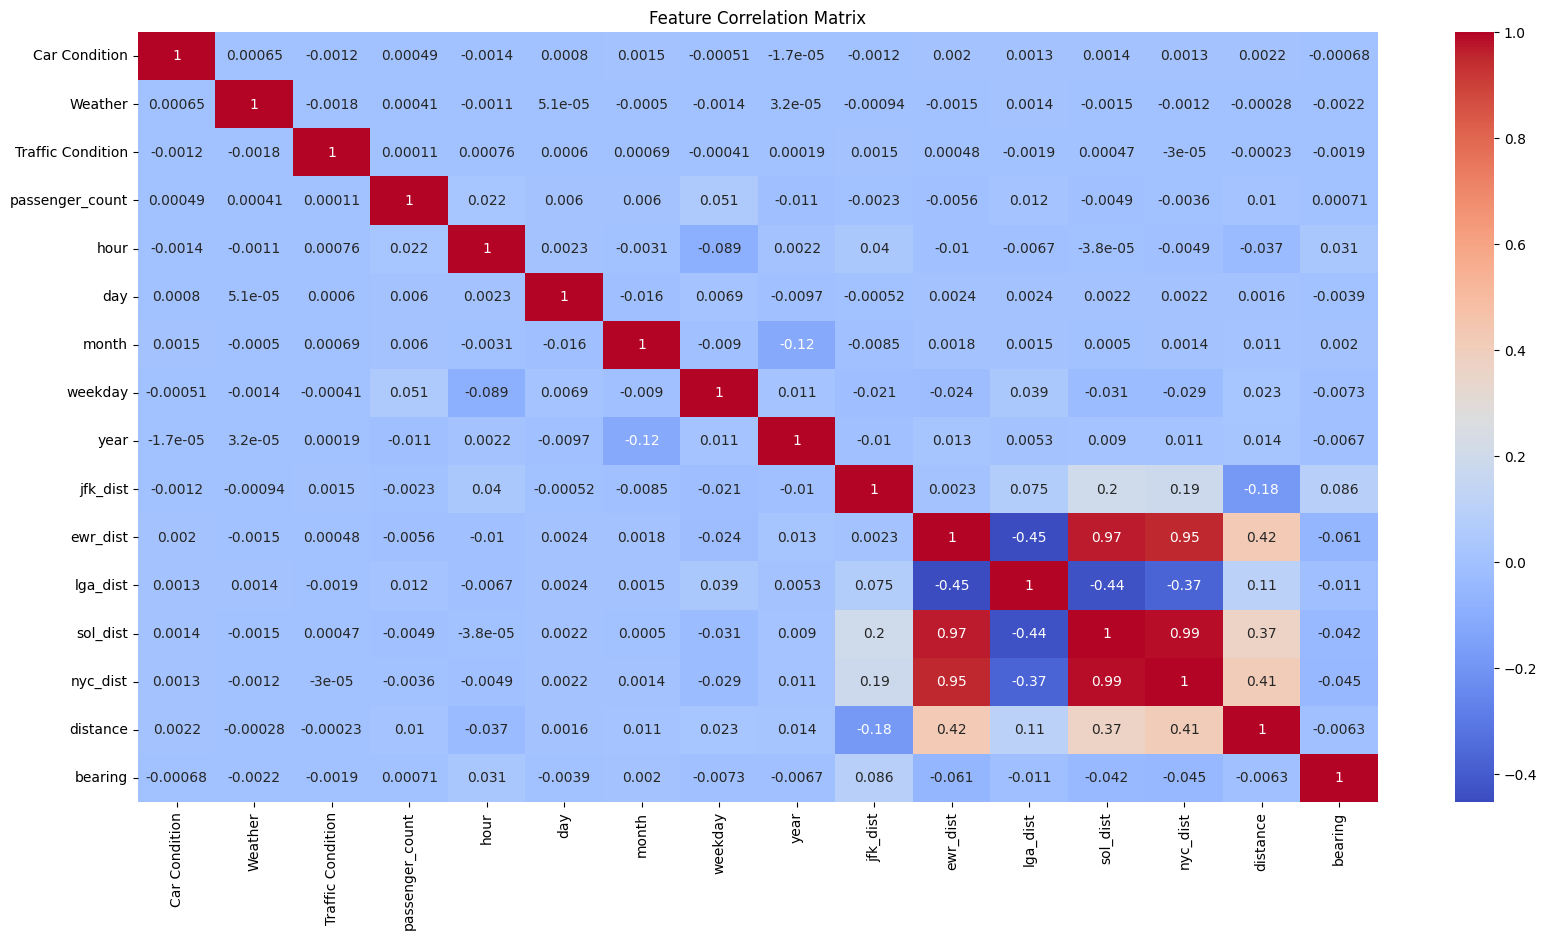

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the hyperparameters
n_estimators = 100  # Example value
max_depth = 20      # Example value

# Initialize the Random Forest model with the provided hyperparameters
rf = RandomForestRegressor(
    n_estimators=n_estimators,
    max_depth=max_depth,
    random_state=42,
    n_jobs = -1
    # Fixed random state for reproducibility
)

# Train the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print the results
print("Random Forest Regression with Provided Hyperparameters:")
print(f"  n_estimators: {n_estimators}")
print(f"  max_depth: {max_depth}")
print(f"  MAE: {mae_rf:.4f}")
print(f"  MSE: {mse_rf:.4f}")
print(f"  R²: {r2_rf:.4f}")

Random Forest Regression with Provided Hyperparameters:
  n_estimators: 100
  max_depth: 20
  MAE: 1.3725
  MSE: 5.0938
  R²: 0.8306


In [32]:
pip install xgboost

In [29]:

import xgboost as xgb
# Initialize the XGBoost regressor
xgb_regressor = xgb.XGBRegressor(
    objective='reg:squarederror',  # Use 'reg:linear' for older versions of XGBoost
    n_estimators=100,             # Number of boosting rounds
    learning_rate=0.1,            # Learning rate
    max_depth=5,                  # Maximum depth of a tree
    subsample=0.8,                # Fraction of samples used for training
    colsample_bytree=0.8,         # Fraction of features used for training
    random_state=42
)

# Train the model
xgb_regressor.fit(X_train, y_train)

# Make predictions
y_pred = xgb_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
# Calculate R^2
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")

Mean Squared Error: 5.2783134727262615
R^2 Score: 0.8244510476512952
